In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gmplot 
import statistics

In [14]:
train = pd.read_csv('./data/sample_rent.csv')
train.head(5)

,STATION,YEAR,MONTH,DAY,HOUR,WEEKDAY,SEASON,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY,SNOWFALL,RENTCOUNT
0,1,2013,1,1,0,1,3,-8.8,0.0,0.1,90.0,8.8,0.0
1,1,2013,1,1,1,1,3,-8.5,0.0,0.9,90.0,8.8,0.0
2,1,2013,1,1,2,1,3,-8.5,0.0,1.0,89.0,8.8,0.0
3,1,2013,1,1,3,1,3,-9.0,0.0,0.7,91.0,8.8,0.0
4,1,2013,1,1,4,1,3,-9.1,0.0,0.6,92.0,8.8,0.0


In [153]:
station_df = pd.read_csv('./data/station.csv')
station_df.head(5)

,번호,키오스크번호,구별,명칭,위치,주소,거치대,좌표
0,1,1,유성구,무역전시관입구(택시승강장 앞),엑스포다리 맞은편,유성구 도룡동 3-8,14,"36.374325,127.387462"
1,2,2,유성구,대전컨벤션 센터 앞,둔산대교 맞은편,유성구 도룡동 4-19,20,"36.374472,127.392241"
2,3,3,서구,한밭수목원(정문입구),한밭수목원 내,서구 만년동 396,19,"36.369855,127.388749"
3,4,4,서구,초원아파트104동부근(버스정류장),초원아파트 104동앞 쪽문 육교 버스정류장 앞,서구 만년동 401,12,"36.368192,127.379281"
4,5,5,서구,둔산대공원 입구(버스정류장),한밭수목원에서 평송수련원 가는길 버스정류장 앞,서구 둔산동 1521-10,13,"36.365034,127.389361"


In [16]:
train.describe()

,STATION,YEAR,MONTH,DAY,HOUR,WEEKDAY,SEASON,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY,SNOWFALL,RENTCOUNT
count,1.261440e+06,1261440.0,1.261440e+06,1.261440e+06,1.261440e+06,1.261440e+06,1.261440e+06,1.261440e+06,1.261440e+06,1.261440e+06,1.261440e+06,1.261440e+06,1.261440e+06
mean,7.250000e+01,2013.0,6.526027e+00,1.572055e+01,1.150000e+01,2.994521e+00,1.490411e+00,1.312479e+01,1.278767e-01,1.575057e+00,7.296952e+01,5.778881e-01,8.209356e-01
std,4.156823e+01,0.0,3.447853e+00,8.796250e+00,6.922189e+00,1.999993e+00,1.116767e+00,1.132480e+01,9.294803e-01,1.078129e+00,1.995988e+01,2.442430e+00,2.338449e+00
min,1.000000e+00,2013.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.650000e+01,0.000000e+00,0.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00
25%,3.675000e+01,2013.0,4.000000e+00,8.000000e+00,5.750000e+00,1.000000e+00,0.000000e+00,3.300000e+00,0.000000e+00,8.000000e-01,6.000000e+01,0.000000e+00,0.000000e+00
50%,7.250000e+01,2013.0,7.000000e+00,1.600000e+01,1.150000e+01,3.000000e+00,1.000000e+00,1.340000e+01,0.000000e+00,1.300000e+00,7.600000e+01,0.000000e+00,0.000000e+00
75%,1.082500e+02,2013.0,1.000000e+01,2.300000e+01,1.725000e+01,5.000000e+00,2.000000e+00,2.340000e+01,0.000000e+00,2.100000e+00,9.000000e+01,0.000000e+00,1.000000e+00
max,1.440000e+02,2013.0,1.200000e+01,3.100000e+01,2.300000e+01,6.000000e+00,3.000000e+00,3.490000e+01,2.870000e+01,7.700000e+00,1.000000e+02,1.840000e+01,1.080000e+02


In [17]:
train.groupby(['STATION'])['RENTCOUNT'].sum().nlargest(10)

STATION
3     55294.0
56    34038.0
17    29633.0
31    28865.0
33    25506.0
32    24668.0
14    20744.0
60    19330.0
55    19058.0
8     18702.0
Name: RENTCOUNT, dtype: float64

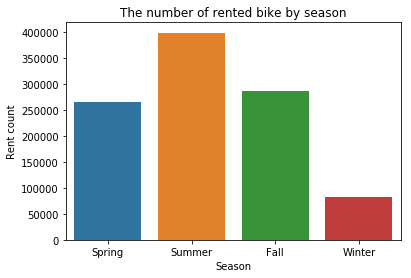

In [19]:
#1-a season graph
group_season = train.groupby(['SEASON'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_season['SEASON'], y=group_season['RENTCOUNT'])
ax.set(xlabel='Season', ylabel='Rent count')
season = ['Spring', 'Summer', 'Fall', 'Winter']
plt.xticks(np.arange(4), season)
plt.title('The number of rented bike by season')
plt.show()

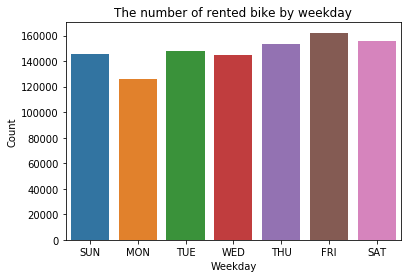

In [26]:
#1-a weekday graph
group_weekday = train.groupby(['WEEKDAY'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_weekday['WEEKDAY'], y=group_weekday['RENTCOUNT'])
ax.set(xlabel='Weekday', ylabel='Count')
weekday = ['SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT']
plt.xticks(np.arange(7), season)
plt.title('The number of rented bike by weekday')
plt.show()

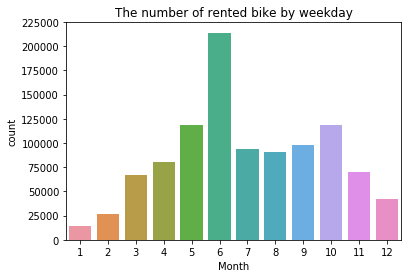

In [25]:
#1-a month graph
group_mn = train.groupby(['MONTH'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_mn['MONTH'], y=group_mn['RENTCOUNT'])
ax.set(xlabel='Month', ylabel='count')
plt.title('The number of rented bike by weekday')
plt.show()

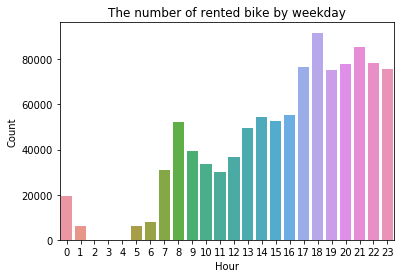

In [24]:
#1-a hour graph
group_hr = train.groupby(['HOUR'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_hr['HOUR'], y=group_hr['RENTCOUNT'])
ax.set(xlabel='Hour', ylabel='Count')
plt.title('The number of rented bike by weekday')
plt.show()

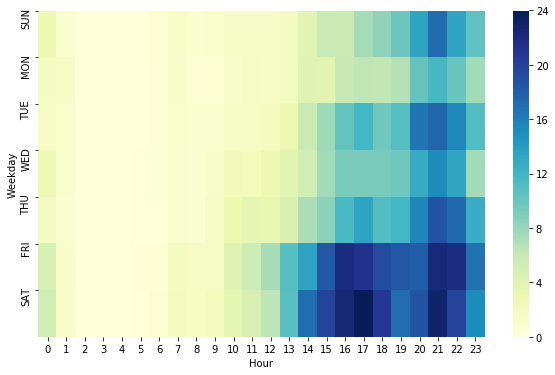

In [50]:
#1-b Heatmap
plt.figure(figsize=(10,6))
station_3 = train[train['STATION']==3]
group_weekday_hour = station_3.groupby(['WEEKDAY', 'HOUR'])['RENTCOUNT'].mean().reset_index()
weekday_hour = np.zeros([7, 24])
for i in range(7*24):
    weekday_hour[int(group_weekday_hour.iloc[i][0])][int(group_weekday_hour.iloc[i][1])] = group_weekday_hour.iloc[i][2]
ax = sns.heatmap(weekday_hour, cmap="YlGnBu")
ax.set(xlabel='Hour', ylabel='Weekday')
weekday = ['SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT']
plt.yticks(np.arange(7), weekday)
plt.show()

## 1-C 인기 경로 map

In [163]:
top10_lat = []
top10_lon = []

top10 = train.groupby(['STATION'])['RENTCOUNT'].sum().nlargest(10).reset_index()
x = int(top10.iloc[0][0])

for j in range(0,10):
    x = int(top10.iloc[j][0])
    for i in station_df.번호:
        if i == x:
#             print(station_df.iloc[i-1][7])
            temp = station_df.iloc[i-1][7].split(',')
            top10_lat.append(float(temp[0]))
            top10_lon.append(float(temp[1]))
            break


In [180]:
gmapl = gmplot.GoogleMapPlotter(statistics.median(top10_lat),
                               statistics.median(top10_lon), 14)
gmapl.scatter(top10_lat, top10_lon, '#FF0000',size=30, marker=False)
gmapl.draw('top10.html')